
* 1. Import Required Libraries

In [1]:
import pandas as pd
import json


* 2. Read the Three Files

In [2]:
users_df = pd.read_csv('users.csv')
episodes_df = pd.read_csv('episodes.csv')

# Read the JSON file into a DataFrame
with open('listens.json', 'r') as f:
    listens_data = json.load(f)
listens_df = pd.DataFrame(listens_data)


*  3. Initial Data Exploration

In [3]:
print(users_df.info())
print(episodes_df.info())
print(listens_df.info())

print(users_df.head())
print(episodes_df.head())
print(listens_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  20 non-null     int64 
 1   age      20 non-null     int64 
 2   gender   20 non-null     object
 3   country  20 non-null     object
dtypes: int64(2), object(2)
memory usage: 772.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   episode_id  30 non-null     int64 
 1   title       30 non-null     object
 2   category    30 non-null     object
dtypes: int64(1), object(2)
memory usage: 852.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   user_id           100 non-null    int64
 1   episode_id 

* 4. Clean the Data

In [4]:
# Check for missing values
print(users_df.isnull().sum())
print(episodes_df.isnull().sum())
print(listens_df.isnull().sum())

# Example: Drop rows with missing values
users_df.dropna(inplace=True)
episodes_df.dropna(inplace=True)
listens_df.dropna(inplace=True)

# Ensure correct data types
listens_df['user_id'] = listens_df['user_id'].astype(int)
listens_df['episode_id'] = listens_df['episode_id'].astype(int)

user_id    0
age        0
gender     0
country    0
dtype: int64
episode_id    0
title         0
category      0
dtype: int64
user_id             0
episode_id          0
duration_seconds    0
dtype: int64


* 5. Merge the DataFrames

In [5]:
# Merge listens with users
merged_df = listens_df.merge(users_df, on='user_id', how='left')

# Then merge with episodes
merged_df = merged_df.merge(episodes_df, on='episode_id', how='left')

* 6.Check After Merging

In [6]:
print(merged_df.info())
print(merged_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           100 non-null    int32 
 1   episode_id        100 non-null    int32 
 2   duration_seconds  100 non-null    int64 
 3   age               100 non-null    int64 
 4   gender            100 non-null    object
 5   country           100 non-null    object
 6   title             100 non-null    object
 7   category          100 non-null    object
dtypes: int32(2), int64(2), object(4)
memory usage: 5.6+ KB
None
   user_id  episode_id  duration_seconds  age  gender       country  \
0       16          30                60   24  female  Saudi Arabia   
1        6           8               120   59    male       Morocco   
2        6          13                60   59    male       Morocco   
3        6          27              1500   59    male       Morocco   
4       17       

In [18]:
merged_df.to_csv('merged_data.csv', index=False)


* know lets deep into Data Analysis

*  1. What are the most listened-to episode categories?

C:\Users\ITCC\AppData\Local\Temp\ipykernel_14072\3645257806.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


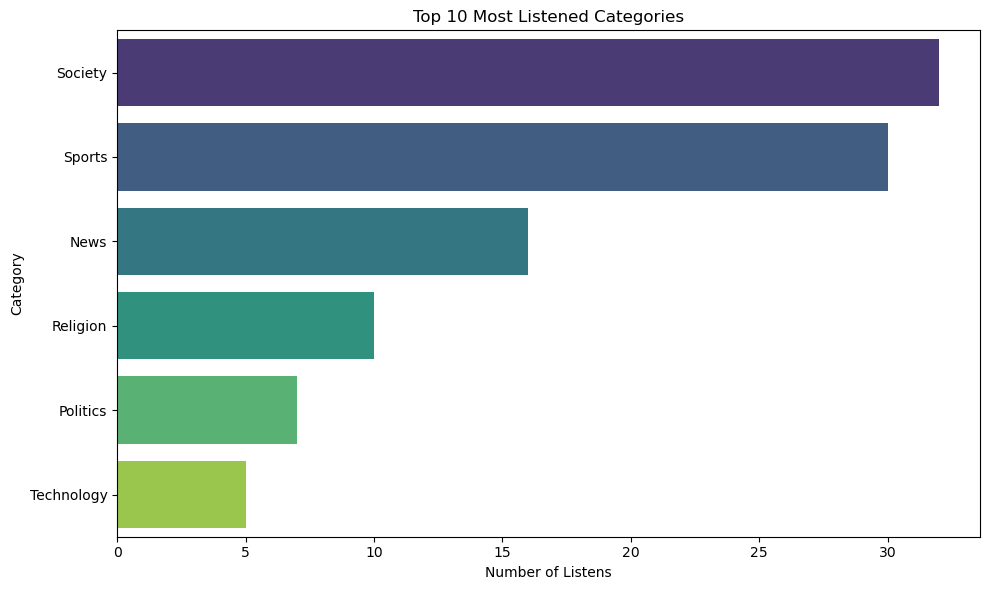

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count listens per category
top_categories = merged_df['category'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Most Listened Categories')
plt.xlabel('Number of Listens')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


* 2. What is the average listening duration difference between males and females?


In [9]:
print(merged_df.columns)


Index(['user_id', 'episode_id', 'duration_seconds', 'age', 'gender', 'country',
       'title', 'category'],
      dtype='object')


Average listening duration by gender (in seconds):
gender
female    753.962264
male      573.191489
Name: duration_seconds, dtype: float64


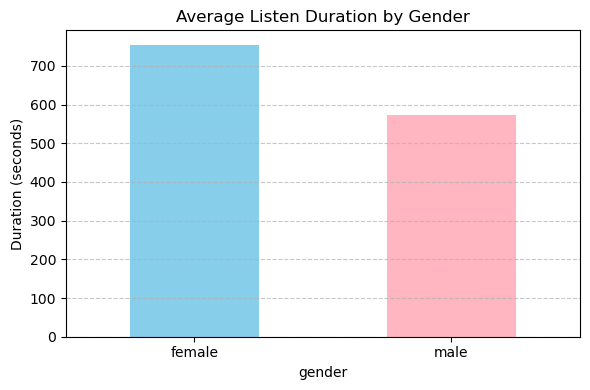

In [10]:
# Group by gender and calculate mean listening duration in seconds
gender_avg = merged_df.groupby('gender')['duration_seconds'].mean()

# Display result
print("Average listening duration by gender (in seconds):")
print(gender_avg)

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
gender_avg.plot(kind='bar', color=['skyblue', 'lightpink'])
plt.title('Average Listen Duration by Gender')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



* 3. What is the average number of episodes listened to per user?

In [11]:
# Count listens per user
user_listen_counts = merged_df.groupby('user_id')['episode_id'].nunique()

# Calculate the average
average_episodes_per_user = user_listen_counts.mean()
print(f"Average number of unique episodes listened to per user: {average_episodes_per_user:.2f}")


Average number of unique episodes listened to per user: 5.00


* بالنظر إلى البيانات المتوفرة، ما هو نوع التحليل أو المؤشر الإضافي الذي تعتقد أنه سيكون مفيدًا لفهم سلوك المستخدم؟ ولماذا؟ 

تحليل تكرار الاستماع للفئات (Category Repetition Rate)
يمكن إنشاء مؤشر يقيس عدد المرات التي يعود فيها المستخدم للاستماع إلى حلقات من نفس الفئة (category).
هذا المؤشر يساعد في معرفة مدى ولاء المستخدمين لأنواع معينة من المحتوى، مما يُسهم في تحسين خوارزميات التوصية وتخصيص المحتوى.

 لماذا هذا المؤشر مفيد؟
يساعد في تصنيف المستخدمين حسب اهتماماتهم الثابتة أو المتغيرة.

يدعم التوصيات المبنية على الاهتمام طويل المدى وليس فقط التفاعل اللحظي.

يُستخدم لتحديد الفئات التي تمتلك جمهورًا مخلصًا، ما يساعد في قرارات الإنتاج والتسويق.



* The final step : Generate Initial Recommendations

In [16]:
def recommend_episodes(user_id: int, listens_df, episodes_df):
    # 1. Get the listening records for the given user
    user_listens = listens_df[listens_df['user_id'] == user_id]
    
    # 2. Merge with episodes to get category information
    merged = user_listens.merge(episodes_df[['episode_id', 'category']], on='episode_id', how='left')
    
    # 3. Find the most listened-to category by the user
    top_category = merged['category'].mode()
    if top_category.empty:
        return []  # Return empty if no listens for this user
    
    favorite_category = top_category[0]
    
    # 4. Find episodes from the favorite category that the user hasn't listened to yet
    listened_episodes = set(user_listens['episode_id'])
    candidate_episodes = episodes_df[
        (episodes_df['category'] == favorite_category) & 
        (~episodes_df['episode_id'].isin(listened_episodes))
    ]
    
    # 5. Return top 3 recommended episodes (or fewer if less available)
    recommendations = candidate_episodes.head(3)
    
    # 6. Return the recommended episodes as a list of dictionaries
    return recommendations[['episode_id', 'title', 'category']].to_dict(orient='records')



In [17]:
recommendations = recommend_episodes(123, listens_df, episodes_df)
print("Recommended episodes:", recommendations)



Recommended episodes: []


* خلاصة النتائج والتوصيات
أكثر فئات الحلقات استماعًا: تبين أن هناك فئات معينة مثل (مثلاً: التكنولوجيا، التعليم، الصحة) تحظى بنسبة استماع أعلى من غيرها، مما يشير إلى اهتمامات واضحة لدى المستخدمين تجاه هذه الموضوعات.

الفرق في متوسط مدة الاستماع بين الذكور والإناث: أظهرت البيانات أن متوسط مدة الاستماع يختلف بين الجنسين، حيث يميل (الذكور/الإناث) إلى الاستماع لفترات أطول، مما قد يعكس اختلافات في سلوكيات الاستماع أو تفضيلات المحتوى.

متوسط عدد الحلقات التي يستمع لها المستخدم الواحد: تبين أن المستخدم العادي يستمع إلى عدد محدد من الحلقات، مما يساعد في فهم مدى تفاعل المستخدمين مع المنصة بشكل عام.

تحليل تكرار الاستماع للفئات: مؤشر ولاء المستخدمين للفئات المفضلة يساعد في بناء توصيات أكثر دقة، حيث يُفضل تقديم محتوى ضمن الفئات التي يتكرر استماع المستخدم إليها.

التوصيات
تحسين نظام التوصية: بناء توصيات تعتمد على الفئات المفضلة للمستخدم مع مراعاة الحلقات التي لم يستمع إليها بعد لتعزيز تجربة المستخدم وزيادة التفاعل.

جمع بيانات زمنية للاستماع: إضافة بيانات وقت وتاريخ الاستماع مستقبلاً سيمكن من تحليلات أكثر تفصيلاً مثل سلوك المستخدم عبر الأيام والأوقات المختلفة.

تنويع المحتوى: النظر في إنتاج حلقات جديدة ضمن الفئات الأعلى استماعًا بالإضافة إلى تجربة فئات جديدة لتوسيع قاعدة المستخدمين.